In [1]:
!git clone https://github.com/Deebamajeed/BRCA-Subtype-DR.git

Cloning into 'BRCA-Subtype-DR'...
remote: Enumerating objects: 205, done.
remote: Counting objects: 100% (205/205), done.
remote: Compressing objects: 100% (190/190), done.
remote: Total 205 (delta 63), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (205/205), 5.65 MiB | 5.28 MiB/s, done.
Resolving deltas: 100% (63/63), done.


In [99]:
import torch 
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd
import math
import sklearn.preprocessing as sk
import seaborn as sns
from sklearn import metrics
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
#import utils
#from myutils import AllTripletSelector,HardestNegativeTripletSelector, RandomNegativeTripletSelector, SemihardNegativeTripletSelector # Strategies for selecting triplets within a minibatch
#from mymetrics import AverageNonzeroTripletsMetric
#from utils import RandomNegativeTripletSelector

from torch.utils.data.sampler import WeightedRandomSampler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
import random
from random import randint
from sklearn.model_selection import StratifiedKFold,RepeatedKFold
from sklearn.metrics import roc_curve, auc
from scipy import interp

import numpy as np
import warnings
import math
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import preprocessing
warnings.filterwarnings("ignore")

save_results_to = '/content/results_multi'
#torch.manual_seed(42)
random.seed(42)

max_iter = 1



TCGAEx_clin = pd.read_csv("/content/BRCA-Subtype-DR/Subtype/Data/clins.csv", 
                    index_col=0, header=None)
TCGAEx_meth = pd.read_csv("/content/BRCA-Subtype-DR/Subtype/Data/meths.csv", 
                    index_col=0, header=None)
TCGAEx_mirs = pd.read_csv("/content/BRCA-Subtype-DR/Subtype/Data/mirs.csv", 
                    index_col=0, header=None)
TCGAEx_muts = pd.read_csv("/content/BRCA-Subtype-DR/Subtype/Data/muts.csv", 
                    index_col=0, header=None)
TCGAEx_prots = pd.read_csv("/content/BRCA-Subtype-DR/Subtype/Data/prots.csv", 
                    index_col=0, header=None)
TCGAEx_rnas = pd.read_csv("/content/BRCA-Subtype-DR/Subtype/Data/rnas.csv", 
                    index_col=0, header=None)  
TCGAEx_cnv = pd.read_csv("/content/BRCA-Subtype-DR/Subtype/Data/cnv.csv", 
                    index_col=0, header=None)
TCGAEx_clin=TCGAEx_clin.values
TCGAEx_meth=TCGAEx_meth.values
TCGAEx_mirs=TCGAEx_mirs.values
TCGAEx_muts=TCGAEx_muts.values
TCGAEx_prots=TCGAEx_prots.values
TCGAEx_rnas=TCGAEx_rnas.values
TCGAEx_cnvs=TCGAEx_cnv.values
#print(TCGAEx)

label_df=pd.read_csv("/content/BRCA-Subtype-DR/Subtype/Data/label.csv",header=None)
Y=label_df[0].values
data1=TCGAEx_clin[:,:]
data2=TCGAEx_meth[:,:]
data3=TCGAEx_mirs[:,:]
data4=TCGAEx_muts[:,:]
data5=TCGAEx_prots[:,:]
data6=TCGAEx_rnas[:,:]
#print(label)


print(data1.shape)

print(data2.shape)

print(data3.shape)

print(data4.shape)

print(data5.shape)

print(data6.shape)

print(Y)
'''
print(data1)
a=input()
print(data2)
a=input()
print(data3)
a=input()
print(data4)
a=input()
print(data5)
a=input()
print(data6)
a=input()
print(Y.shape)
'''
TCGAE1 = data1
TCGAE2 = data2
TCGAE3 = data3
TCGAE4 = data4
TCGAE5 = data5
TCGAE6 = data6
print(TCGAE2)

#TCGAE3 = SelectKBest(chi2, k=30).fit_transform(data3, Y)
#TCGAE4 = SelectKBest(chi2, k=14).fit_transform(data4, Y)
#TCGAE5 = SelectKBest(chi2, k=269).fit_transform(data5, Y)
#TCGAE6 = SelectKBest(chi2, k=100).fit_transform(data6, Y)
#print(Y)
'''
ls_mb_size = [13, 36, 64]
ls_h_dim = [1024, 256, 128, 512, 64, 16]
#ls_h_dim = [32, 16, 8, 4]
ls_marg = [0.5, 1, 1.5, 2, 2.5, 3]
ls_lr = [0.5, 0.1, 0.05, 0.01, 0.001, 0.005, 0.0005, 0.0001,0.00005, 0.00001]
ls_epoch = [20, 50, 90, 100]
ls_rate = [0.3, 0.4, 0.5]
ls_wd = [0.1, 0.001, 0.0001]
ls_lam = [0.1, 0.5, 0.01, 0.05, 0.001, 0.005]
'''
ls_mb_size = [64]
ls_h_dim = [512]

ls_lr = [0.01]
ls_epoch = [10]
ls_rate = [0.5]
ls_wd = [0.001]


skf = StratifiedKFold(n_splits=5, random_state=None,shuffle=True)

rkf = RepeatedKFold(n_splits=5, n_repeats=2, random_state=0)
for iters in range(max_iter):
    #print('iters:',iters)
    k = 0
    mbs = random.choice(ls_mb_size)
    hdm = random.choice(ls_h_dim)
    #mrg = random.choice(ls_marg)
    lre = random.choice(ls_lr)
    lrCL = random.choice(ls_lr)
    epch = random.choice(ls_epoch)
    rate = random.choice(ls_rate)
    wd = random.choice(ls_wd)   
    #lam = random.choice(ls_lam)

    costtr_all=[]
    costts_all=[]
    auctr_all=[]
    aucts_all=[]
    acctr_all=[]
    accts_all=[]
    sentr_all=[]
    sents_all=[]
    spetr_all=[]
    spets_all=[]
  
    mean_tpr = 0.0             

    mean_fpr = np.linspace(0, 1, 100)

    #cnt = 0

    for repeat in range(10):
        for train_index, test_index in rkf.split(TCGAE1, Y.astype('int')):
            
          if(k%5==0):
            k = k + 1
            X_trainE1 = TCGAE1[train_index,:]
            X_trainE2 = TCGAE2[train_index,:]
            X_trainE3 = TCGAE3[train_index,:]
            X_trainE4 = TCGAE4[train_index,:]
            X_trainE5 = TCGAE5[train_index,:]
            X_trainE6 = TCGAE6[train_index,:]
            X_testE1 =  TCGAE1[test_index,:]
            X_testE2 =  TCGAE2[test_index,:]
            X_testE3 =  TCGAE3[test_index,:]
            X_testE4 =  TCGAE4[test_index,:]
            X_testE5 =  TCGAE5[test_index,:]
            X_testE6 =  TCGAE6[test_index,:]
            y_trainE = Y[train_index]
            y_testE = Y[test_index]
       
            
            TX_testE1 = torch.FloatTensor(X_testE1)
            TX_testE2 = torch.FloatTensor(X_testE2)
            TX_testE3 = torch.FloatTensor(X_testE3)
            TX_testE4 = torch.FloatTensor(X_testE4)
            TX_testE5 = torch.FloatTensor(X_testE5)
            TX_testE6 = torch.FloatTensor(X_testE6)
            ty_testE = torch.FloatTensor(y_testE.astype(int))
            
            #Train
            class_sample_count = np.array([len(np.where(y_trainE==t)[0]) for t in np.unique(y_trainE)])
            print(class_sample_count)
            
            weight = 1. / class_sample_count
            samples_weight = np.array([weight[t] for t in y_trainE])

            samples_weight = torch.from_numpy(samples_weight)
            sampler = WeightedRandomSampler(samples_weight.type('torch.DoubleTensor'), len(samples_weight), replacement=True)

            mb_size = mbs

            trainDataset = torch.utils.data.TensorDataset(torch.FloatTensor(X_trainE1),torch.FloatTensor(X_trainE2),
                                                          torch.FloatTensor(X_trainE3),torch.FloatTensor(X_trainE4),torch.FloatTensor(X_trainE5),
                                                          torch.FloatTensor(X_trainE6),torch.FloatTensor(y_trainE.astype(int)))

            trainLoader = torch.utils.data.DataLoader(dataset = trainDataset, batch_size=mb_size, shuffle=True, num_workers=0)

            n_sampE1, IE1_dim = X_trainE1.shape
            n_sampE2, IE2_dim = X_trainE2.shape
            n_sampE3, IE3_dim = X_trainE3.shape
            n_sampE4, IE4_dim = X_trainE4.shape
            n_sampE5, IE5_dim = X_trainE5.shape
            n_sampE6, IE6_dim = X_trainE6.shape

            h_dim1 = hdm
            h_dim2 = hdm
            h_dim3 = hdm
            h_dim4 = hdm
            h_dim5 = hdm
            h_dim6 = hdm
            Z_in = h_dim1+h_dim2+h_dim3+h_dim4+h_dim5+h_dim6
            #marg = mrg
            lrE = lre
            epoch = epch

            costtr = []
            auctr = []
            costts = []
            aucts = []
            acctr=[]
            accts=[]
            acc0tr=[]
            acc0ts=[]
            sentr=[]
            sents=[]
            spetr=[]
            spets=[]
            class AEE(nn.Module):
                def __init__(self):
                    super(AEE, self).__init__()
                    self.EnE = torch.nn.Sequential(
                        nn.Linear(IE1_dim, h_dim1),
                        nn.BatchNorm1d(h_dim1),
                        nn.ReLU(),
                        nn.Dropout(rate))
                def forward(self, x):
                    output = self.EnE(x)
                    return output

            class AEM(nn.Module):
                def __init__(self):
                    super(AEM, self).__init__()
                    self.EnM = torch.nn.Sequential(
                        nn.Linear(IE2_dim, h_dim2),
                        nn.BatchNorm1d(h_dim2),
                        nn.ReLU(),
                        nn.Dropout(rate))
                def forward(self, x):
                    output = self.EnM(x)
                    return output    


            class AEC(nn.Module):
                def __init__(self):
                    super(AEC, self).__init__()
                    self.EnC = torch.nn.Sequential(
                        nn.Linear(IE3_dim, h_dim3),
                        nn.BatchNorm1d(h_dim3),
                        nn.ReLU(),
                        nn.Dropout(rate))
                def forward(self, x):
                    output = self.EnC(x)
                    return output    

            class AED(nn.Module):
                def __init__(self):
                    super(AED, self).__init__()
                    self.EnD = torch.nn.Sequential(
                        nn.Linear(IE4_dim, h_dim4),
                        nn.BatchNorm1d(h_dim4),
                        nn.ReLU(),
                        nn.Dropout(rate))
                def forward(self, x):
                    output = self.EnD(x)
                    return output

            class AEF(nn.Module):
                def __init__(self):
                    super(AEF, self).__init__()
                    self.EnF = torch.nn.Sequential(
                        nn.Linear(IE5_dim, h_dim5),
                        nn.BatchNorm1d(h_dim5),
                        nn.ReLU(),
                        nn.Dropout(rate))
                def forward(self, x):
                    output = self.EnF(x)
                    return output    


            class AEP(nn.Module):
                def __init__(self):
                    super(AEP, self).__init__()
                    self.EnP = torch.nn.Sequential(
                        nn.Linear(IE6_dim, h_dim6),
                        nn.BatchNorm1d(h_dim6),
                        nn.ReLU(),
                        nn.Dropout(rate))
                def forward(self, x):
                    output = self.EnP(x)
                    return output
            
            class OnlineTriplet(nn.Module):
                def __init__(self, marg, triplet_selector):
                    super(OnlineTriplet, self).__init__()
                    self.marg = marg
                    self.triplet_selector = triplet_selector
                def forward(self, embeddings, target):
                    triplets = self.triplet_selector.get_triplets(embeddings, target)
                    return triplets
          
          
            class Classifier(nn.Module):
                def __init__(self):
                    super(Classifier, self).__init__()
                    self.FC = torch.nn.Sequential(
                        nn.Linear(Z_in, 5),
                        nn.Dropout(rate))
                def forward(self, x):
                    return F.softmax(self.FC(x))
                    #return self.FC(x)

            torch.cuda.manual_seed_all(42)

            AutoencoderE1 = AEE()
            AutoencoderE2 = AEM()
            AutoencoderE3 = AEC()
            AutoencoderE4 = AED()
            AutoencoderE5 = AEF()
            AutoencoderE6 = AEP()

            solverE1 = optim.Adagrad(AutoencoderE1.parameters(), lr=lrE)
            solverE2 = optim.Adagrad(AutoencoderE2.parameters(), lr=lrE)
            solverE3 = optim.Adagrad(AutoencoderE3.parameters(), lr=lrE)
            solverE4 = optim.Adagrad(AutoencoderE4.parameters(), lr=lrE)
            solverE5 = optim.Adagrad(AutoencoderE5.parameters(), lr=lrE)
            solverE6 = optim.Adagrad(AutoencoderE6.parameters(), lr=lrE)
            Clas = Classifier()
            SolverClass = optim.Adagrad(Clas.parameters(), lr=lrCL, weight_decay = wd)
            C_loss = torch.nn.CrossEntropyLoss()
            print('epoch_all',epoch)
            for it in range(epoch):
                #print('epoch:',it)
                epoch_cost4 = []
                epoch_cost3 = []
                p_real=[]
                p_pred=[]
                n_real=[]
                n_pred=[]
                p_realt=[]
                p_predt=[]
                n_realt=[]
                n_predt=[]
             
                correct = torch.zeros(1).squeeze()
                total = torch.zeros(1).squeeze()
                correctt = torch.zeros(1).squeeze()
                totalt = torch.zeros(1).squeeze()
                num_minibatches = int(n_sampE1 / mb_size) 

                for i, (dataE1,dataE2,dataE3,dataE4,dataE5,dataE6,target) in enumerate(trainLoader):
                    
                    flag = 0
                    AutoencoderE1.train()
                    AutoencoderE2.train()
                    AutoencoderE3.train()
                    AutoencoderE4.train()
                    AutoencoderE5.train()
                    AutoencoderE6.train()
                    Clas.train()

                    #if torch.mean(target)!=0. and torch.mean(target)!=1.: 
                    ZEX1 = AutoencoderE1(dataE1)
                    ZEX2 = AutoencoderE2(dataE2)
                    ZEX3 = AutoencoderE3(dataE3)
                    ZEX4 = AutoencoderE4(dataE4)
                    ZEX5 = AutoencoderE5(dataE5)
                    ZEX6 = AutoencoderE6(dataE6)
                    ZT = torch.cat((ZEX1, ZEX2, ZEX3,ZEX4, ZEX5, ZEX6), 1)
                    ZT = F.normalize(ZT, p=2, dim=0)
                    Pred = Clas(ZT)

                    #Triplets = TripSel2(ZEX, target)
                    #loss = lam * trip_criterion(ZEX[Triplets[:,0],:],ZEX[Triplets[:,1],:],ZEX[Triplets[:,2],:]) + C_loss(Pred,target.view(-1,1))     
                    loss=C_loss(Pred,target.view(-1,1).long().squeeze())
                    y_true = target.view(-1,1)
                    y_pred = Pred

                    prediction = torch.argmax(y_pred, 1)
                    correct += (prediction == target.long().squeeze()).sum().float()
                    total += len(target)
                   

                            
                    solverE1.zero_grad()
                    solverE2.zero_grad()
                    solverE3.zero_grad()
                    solverE4.zero_grad()
                    solverE5.zero_grad()
                    solverE6.zero_grad()
                    SolverClass.zero_grad()

                    loss.backward()

                    solverE1.step()
                    solverE2.step()
                    solverE3.step()
                    solverE4.step()
                    solverE5.step()
                    solverE6.step()
                    SolverClass.step()

                    epoch_cost4.append(loss)
                    
                flag = 1

                if flag == 1:
                    costtr.append(torch.mean(torch.FloatTensor(epoch_cost4)))
                   
                    acc=(correct/total).detach().numpy()
                    acctr.append(acc)
                if(it==epoch-1):
                    print('acctrain:',acc)
                    
                    
                with torch.no_grad():

                    AutoencoderE1.eval()
                    AutoencoderE2.eval()
                    AutoencoderE3.eval()
                    AutoencoderE4.eval()
                    AutoencoderE5.eval()
                    AutoencoderE6.eval()
                    Clas.eval()

                    #ZET = AutoencoderE(TX_testE)
                    ZET1 = AutoencoderE1(TX_testE1)
                    ZET2 = AutoencoderE2(TX_testE2)
                    ZET3 = AutoencoderE3(TX_testE3)
                    ZET4 = AutoencoderE4(TX_testE4)
                    ZET5 = AutoencoderE5(TX_testE5)
                    ZET6 = AutoencoderE6(TX_testE6)
                    ZTT = torch.cat((ZET1, ZET2, ZET3,ZET4, ZET5, ZET6), 1)
                    ZTT = F.normalize(ZTT, p=2, dim=0)
                    PredT = Clas(ZTT)

                    #TripletsT = TripSel2(ZET, ty_testE)
                    #lossT = lam * trip_criterion(ZET[TripletsT[:,0],:], ZET[TripletsT[:,1],:], ZET[TripletsT[:,2],:]) + C_loss(PredT,ty_testE.view(-1,1))
                    lossT=C_loss(PredT,ty_testE.view(-1,1).long().squeeze())
                    y_truet = ty_testE.view(-1,1)
                    y_predt = PredT

                    predictiont = torch.argmax(y_predt, 1)
                    correctt += (predictiont == y_truet.long().squeeze()).sum().float()
                    totalt += len(y_truet)
                   
                    costts.append(lossT)
                    acc=(correctt/totalt).detach().numpy()
                    accts.append(acc)
                    cm = confusion_matrix(y_truet, predictiont)
                    print(cm)
                    cm_df = pd.DataFrame(cm,
                     index = ['Basal','Her2','LumA','LumB','Unknown'], 
                     columns = ['Basal','Her2','LumA','LumB','Unknown'])
                   
                    
                if(it==epoch-1):
                   
                    print('acctest:',acc)
                   
                    

            acctr_all.append(acctr)
            accts_all.append(accts)
            costtr_all.append(costtr)
            costts_all.append(costts)

            if k%50==0:
                
                costtr_all=np.array(costtr_all)
                costts_all=np.array(costts_all)
                costtr5=sum(costtr_all)/k
                costts5=sum(costts_all)/k
                print('cost200:',costts5[-1])
                print('costmin:',min(costts5))
                acctr_all=np.array(acctr_all)
                accts_all=np.array(accts_all)
                acctr5=sum(acctr_all)/k
                accts5=sum(accts_all)/k
                print('acc200:',accts5[-1])
                print('accmax:',max(accts5))
                print('cost:',costts5)
                print('acc:',accts5)
                plt.plot(np.squeeze(costtr5), '-r',np.squeeze(costts5), '-b')
                plt.ylabel('Total cost')
                plt.xlabel('epoch')

                title = 'all_ Cost(5class5000)-skf10   mb_size = {},  h_dim = {} , lrE = {}, epoch = {}, rate = {}, wd = {}, lrCL = {}'.\
                              format( mbs, hdm,  lre, epch, rate, wd, lrCL)

                #title = 'Cost  iter = {}, fold = {}, mb_size = {},  h_dim = {}, marg = {}, lrE = {}, epoch = {}, rate = {}, wd = {}, lrCL = {}, lam = {}'.\
                #              format(iters, k, mbs, hdm, mrg, lre, epch, rate, wd, lrCL, lam)

                plt.suptitle(title)
                plt.savefig(save_results_to + title + '.png', dpi = 150)
                plt.close()
               

                plt.plot(np.squeeze(acctr5), '-r',np.squeeze(accts5), '-b')
                plt.ylabel('Accuracy')
                plt.xlabel('epoch')

                title = 'all_ Accuracy(5class5000)-skf10   mb_size = {},  h_dim = {},  lrE = {}, epoch = {}, rate = {}, wd = {}, lrCL = {}, '.\
                              format( mbs, hdm, lre, epch, rate, wd, lrCL)        

                plt.suptitle(title)
                plt.savefig(save_results_to + title + '.png', dpi = 150)
                plt.close()
               


(700, 14)
(700, 23)
(700, 30)
(700, 14)
(700, 14)
(700, 100)
[2 2 2 2 2 3 3 2 2 0 3 0 2 4 3 3 2 3 0 2 0 0 1 4 0 1 0 2 3 0 3 0 0 2 0 2 0
 2 4 3 0 3 3 0 0 2 2 4 2 0 2 2 2 3 2 0 3 2 2 3 2 2 0 3 3 2 1 2 2 2 3 3 0 2
 1 2 0 2 4 3 2 2 2 4 2 2 2 0 2 3 2 2 3 2 3 3 3 2 2 2 2 2 2 2 1 2 2 2 0 3 2
 3 0 2 2 3 2 3 3 2 2 3 1 3 4 3 2 2 2 2 3 3 2 3 3 3 1 1 3 0 0 2 3 2 2 2 2 2
 2 3 2 2 2 0 3 3 1 2 2 4 2 0 2 2 2 2 3 2 3 2 2 3 0 2 2 3 0 1 2 2 2 0 2 2 2
 2 2 2 3 2 1 0 0 3 0 2 2 2 0 0 3 0 2 3 2 2 3 2 2 2 3 2 2 3 2 3 2 2 3 2 3 1
 2 3 2 3 2 3 2 3 3 0 3 0 0 2 1 3 2 2 3 2 0 2 3 2 0 3 2 2 2 3 0 2 0 2 2 2 1
 4 0 1 2 2 2 2 2 3 0 2 2 2 0 2 2 0 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

In [ ]:
rkf.

In [103]:
import matplotlib.pyplot as pt

# New Section

In [66]:
predictiont.shape

torch.Size([140])

In [100]:
fpr = {}
tpr = {}
thresh ={}


In [101]:

n_class = 5

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_truet, y_predt[:,i], pos_label=i)
    


Text(0, 0.5, 'True Positive rate')

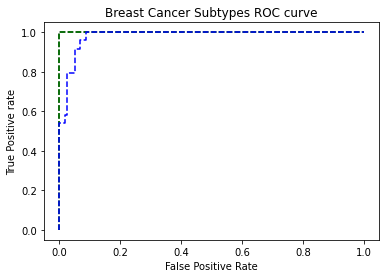

In [105]:
plt.plot(fpr[0], tpr[0], linestyle='--',color='black', label='Basal vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Her2 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='LumA vs Rest')

plt.title('Breast Cancer Subtypes ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')


In [16]:
plt.legend(loc='best')
plt.savefig('Multiclass1 ROC',dpi=300);  

In [44]:
from sklearn.metrics import confusion_matrix

In [70]:
cm = confusion_matrix(y_truet, predictiont)
print(cm)

[[33  0  0  1  0]
 [ 0 27  0  0  0]
 [ 0  0 20  4  0]
 [ 0  0  3 28  0]
 [ 0  0  0  0 24]]


In [71]:
cm_df = pd.DataFrame(cm,
                     index = ['Basal','Her2','LumA','LumB','Unknown'], 
                     columns = ['Basal','Her2','LumA','LumB','Unknown'])

In [98]:
fig = sns_plot.get_figure()
fig.savefig("output1.png")

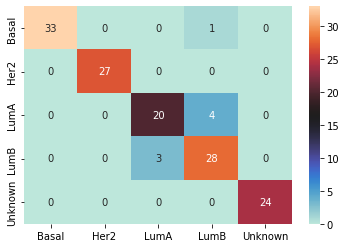

In [97]:
import seaborn as sns
sns_plot=sns.heatmap(cm_df, cmap= "icefire", annot=True)

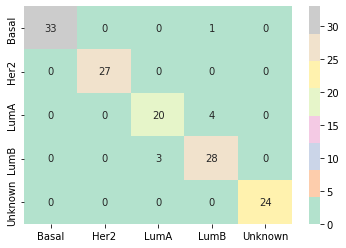

In [96]:
import seaborn as sns
sns_plot=sns.heatmap(cm_df, cmap= "Pastel2", annot=True)